# Appendix_WordCloud
To gain a basic understanding of customer perceptions, we employ **word cloud analysis** to examine the review content.

**Import neccessary libraries** 

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from matplotlib.colors import LinearSegmentedColormap

**Load the raw review dataset**

The original dataset was in Portuguese and has already been translated into English using the Google Sheets function GOOGLETRANSLATE.

In [5]:
reviews = pd.read_csv("olist_order_reviews_dataset_translation.csv", encoding="latin1")

#Select non-empty review_comment_message.
reviews = reviews[reviews['review_comment_message(English)'].notna()]
reviews = reviews[['review_id', 'review_score', 'review_comment_message(English)']]

In [6]:
# Define the list of stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ["product", "order", "one", "thank", "congratulation", "bought","loved","beautiful","congratulations","delivered","good","came","excellent","great"]
stop_words.update(additional_stopwords)

# Define a function to clean the text
def clean_text(text, stop_words):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)    # Remove numbers
    text = text.lower()    # Convert text to lowercase
    words = [word for word in text.split() if word not in stop_words]    # Remove stopwords
    return " ".join(words)

# Clean the text for all reviews
reviews['cleaned_message'] = reviews['review_comment_message(English)'].apply(lambda x: clean_text(x, stop_words))

**Filter reviews by score**

In [8]:
# 1. All reviews
all_reviews = " ".join(review for review in reviews.cleaned_message)

# 2. Reviews with scores of 4-5
high_score_reviews = reviews[reviews['review_score'] >= 4]
high_score_reviews_text = " ".join(review for review in high_score_reviews.cleaned_message)

# 3. Reviews with scores of 1-3
low_score_reviews = reviews[reviews['review_score'] < 4]
low_score_reviews_text = " ".join(review for review in low_score_reviews.cleaned_message)

**Generate word clouds**

In [10]:
col = LinearSegmentedColormap.from_list("custom_cmap", ["#D05525", "#17726D", "#BC9938","#4F9ECF","#61565E"])

# Generate word cloud for all reviews
all_reviews_wordcloud = WordCloud(colormap=col,width=1500, height=600, background_color='white').generate(all_reviews)
# Generate word cloud for reviews with scores of 4-5
high_score_wordcloud = WordCloud(colormap=col,width=1500, height=600, background_color='white').generate(high_score_reviews_text)
# Generate word cloud for reviews with scores of 1-3
low_score_wordcloud = WordCloud(colormap=col,width=1500, height=600, background_color='white').generate(low_score_reviews_text)

**Display word clouds**

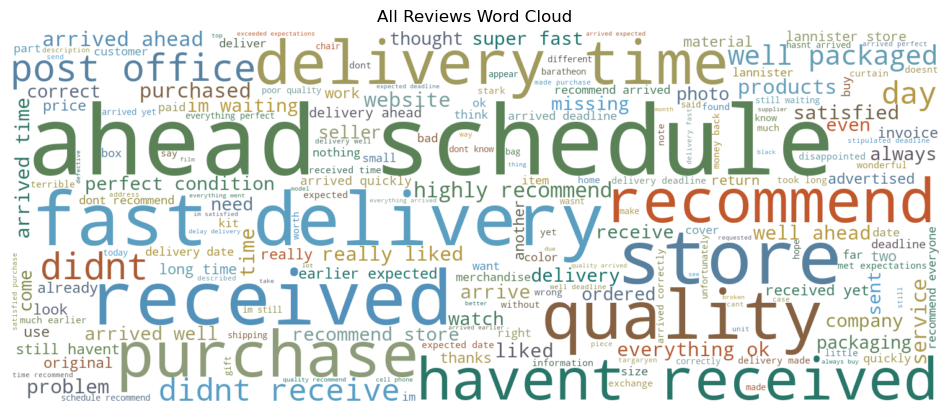

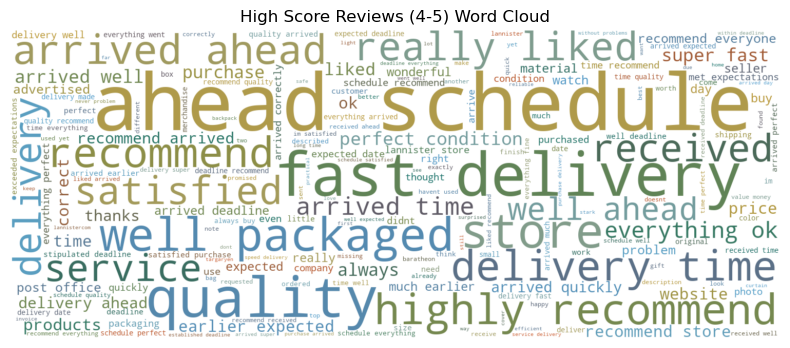

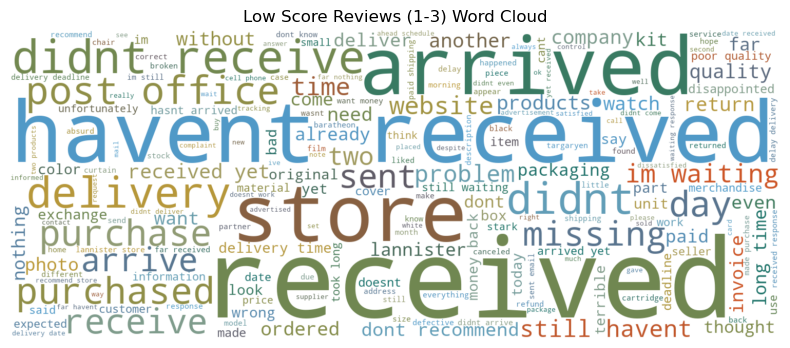

In [12]:
# Display the word cloud for all reviews
plt.figure(figsize=(12, 18))
plt.imshow(all_reviews_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("All Reviews Word Cloud")

# Display the word cloud for reviews with scores of 4-5
plt.figure(figsize=(13, 4))
plt.imshow(high_score_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("High Score Reviews (4-5) Word Cloud")

# Display the word cloud for reviews with scores of 1-3
plt.figure(figsize=(13, 4))
plt.imshow(low_score_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Low Score Reviews (1-3) Word Cloud")

# Show the plots
plt.show()